In [164]:
# Loading data from Google Sheets
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=xlsx"
dataset = pd.ExcelFile(url, engine='openpyxl')

sheets = []
for sheet in dataset.sheet_names:
    df = dataset.parse(sheet)
    df["sheet"] = sheet #adding a column to track from which sheet is the data
    sheets.append(df)

df_airbnb = pd.concat(sheets, ignore_index=True)

In [165]:
# Check the shape of the combined DataFrame
df_airbnb.shape

(51707, 21)

In [166]:
# Exploratory Data Analysis (EDA)
# Create a column for country and weekday/weekend from group column
df_airbnb['city'] = df_airbnb['sheet'].str.split('_').str[0]
df_airbnb['weekday/weekend'] = df_airbnb['sheet'].str.split('_').str[1]


In [167]:
df_airbnb['city'].unique()

array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [168]:
# Create a column for country by mapping city names
country_map = {'amsterdam': 'netherlands', 
               'athens': 'greece',
               'berlin': 'germany',
               'barcelona': 'spain',
               'budapest': 'hungary',
               'lisbon': 'portugal',
               'london': 'uk',
               'paris': 'france',
               'rome': 'italy',
               'vienna': 'austria'}

df_airbnb['country'] = df_airbnb['city'].replace(country_map)

In [169]:
# Change the name of realSum to price
df_airbnb.rename(columns={'realSum': 'price'}, inplace=True)

In [170]:
# Instead of having two columns of room_shared and room_private, create one with the respective categories (was combined with room type)
df_airbnb['room_type_clean'] = df_airbnb.apply(
    lambda row: 'shared room' if row['room_shared'] == True 
        else ('private room' if row['room_private'] == True 
              else 'entire home/apt'), axis=1)

In [171]:
# create a column where one can know if the host of the listing has only one, two to four, or more than four listings based on column multi and biz
df_airbnb['host_listing_count'] = df_airbnb.apply(
    lambda row: 'more than four' if row['biz'] == 1
    else ('one' if row['multi'] == 0
          else 'two to four'), axis=1)

In [172]:
# Display the first entry
df_airbnb.head(1)

,Unnamed: 0,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,rest_index,rest_index_norm,lng,lat,sheet,city,weekday/weekend,country,room_type_clean,host_listing_count
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,weekdays,netherlands,private room,two to four


In [173]:
# Display the last entry
df_airbnb.tail(1)

,Unnamed: 0,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,rest_index,rest_index_norm,lng,lat,sheet,city,weekday/weekend,country,room_type_clean,host_listing_count
51706,1798,133.230489,Private room,False,True,4,True,1,0,10,...,225.247293,5.44414,16.39066,48.20811,vienna_weekends,vienna,weekends,austria,private room,two to four


In [174]:
# Display random sample of 7 entries
df_airbnb.sample(7)

,Unnamed: 0,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,rest_index,rest_index_norm,lng,lat,sheet,city,weekday/weekend,country,room_type_clean,host_listing_count
29898,2822,238.011242,Private room,False,True,2,False,0,0,9,...,387.974698,6.944071,-0.16834,51.56023,london_weekends,london,weekends,uk,private room,one
29506,2430,202.497707,Private room,False,True,3,False,0,1,7,...,532.794676,9.536096,-0.05900,51.52800,london_weekends,london,weekends,uk,private room,more than four
37591,2006,297.325007,Entire home/apt,False,False,2,False,0,0,7,...,784.411656,36.186739,2.38027,48.85429,paris_weekends,paris,weekends,france,entire home/apt,one
38230,2645,266.567248,Entire home/apt,False,False,4,True,0,0,10,...,534.941947,24.678119,2.34219,48.82708,paris_weekends,paris,weekends,france,entire home/apt,one
1513,410,368.617158,Private room,False,True,2,True,1,0,10,...,857.831492,74.782314,4.88485,52.36480,amsterdam_weekends,amsterdam,weekends,netherlands,private room,two to four
16831,132,275.328330,Entire home/apt,False,False,4,False,1,0,9,...,752.151256,33.639011,-9.13177,38.71332,lisbon_weekdays,lisbon,weekdays,portugal,entire home/apt,two to four
46956,3321,69.436327,Private room,False,True,2,True,1,0,10,...,612.711501,13.349497,12.53115,41.88812,rome_weekends,rome,weekends,italy,private room,two to four


In [175]:
# Check data types
df_airbnb.dtypes

Unnamed: 0                      int64
price                         float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
sheet                          object
city                           object
weekday/weekend                object
country                        object
room_type_clean                object
host_listing_count             object
dtype: objec

In [176]:
# basic summary statistics for numeric data
df_airbnb.describe()

,Unnamed: 0,price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,1217.380366,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,646.000000,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,1334.000000,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,2382.000000,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,5378.000000,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [177]:
# basic summary statistics for categorical data
df_airbnb.describe(include="object")

,room_type,sheet,city,weekday/weekend,country,room_type_clean,host_listing_count
count,51707,51707,51707,51707,51707,51707,51707
unique,3,20,10,2,10,3,3
top,Entire home/apt,london_weekends,london,weekends,uk,entire home/apt,one
freq,32648,5379,9993,26207,9993,32648,18534


In [178]:
#checking duplicates in the dataframe
df_airbnb.duplicated().sum()
print(f"This dataset has {int(df_airbnb.duplicated().sum())} duplicates")

This dataset has 0 duplicates


In [179]:
#checking for missing values
df_airbnb.isna().sum()

Unnamed: 0                    0
price                         0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
sheet                         0
city                          0
weekday/weekend               0
country                       0
room_type_clean               0
host_listing_count            0
dtype: int64

In [180]:
# ANOVA test: satisfaction across cities differs significantly
groups = [df_airbnb[df_airbnb["city"]==c]["guest_satisfaction_overall"] for c in df_airbnb["city"].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(f_stat, p_value)

183.31083353929782 0.0


In [181]:
# T-test: guest satisfaction if business/not business differs significantly
t_stat, p_value = stats.ttest_ind(df[df.biz==0]["guest_satisfaction_overall"],
                df[df.biz==1]["guest_satisfaction_overall"])
print("t =", t_stat)
print("p =", p_value)

t = 10.470307333829997
p = 6.074638008877086e-25


In [182]:
mean_non_biz = df[df.biz==0]["guest_satisfaction_overall"].mean()
mean_biz = df[df.biz==1]["guest_satisfaction_overall"].mean()
print("Mean non-business:", mean_non_biz)
print("Mean business:", mean_biz)

Mean non-business: 94.94152542372882
Mean business: 91.23747980613894


In [183]:
# Checking dependence of user satisfaction on other values
categorical_vars = ['biz', 'host_is_superhost', 'weekday/weekend', 'room_type_clean']

for var in categorical_vars:
    table = pd.crosstab(df_airbnb[var], df_airbnb['guest_satisfaction_overall'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Chi-square test for {var} vs guest_satisfaction:")
    print(f"Chi2 = {chi2:.2f}, p = {p:.5f}\n")

Chi-square test for biz vs guest_satisfaction:
Chi2 = 3620.75, p = 0.00000

Chi-square test for host_is_superhost vs guest_satisfaction:
Chi2 = 14117.53, p = 0.00000

Chi-square test for weekday/weekend vs guest_satisfaction:
Chi2 = 21.48, p = 0.99994

Chi-square test for room_type_clean vs guest_satisfaction:
Chi2 = 406.00, p = 0.00000



/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_22963/3432735908.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


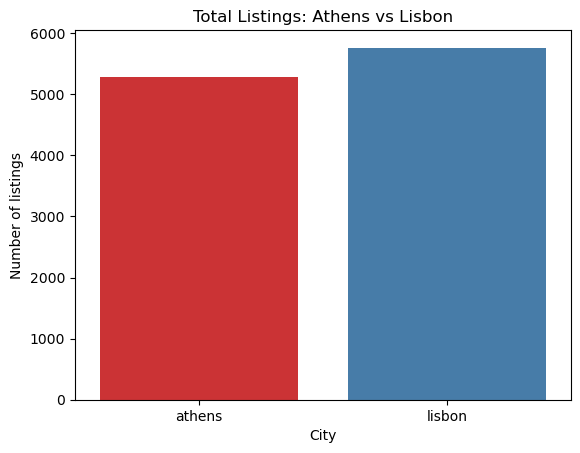

In [186]:
# Comparing cities with the highest and lowest guest satisfaction

counts = (
    df_airbnb[df_airbnb['city'].isin(['athens', 'lisbon'])]
    .groupby('city')
    .size()
    .reset_index(name='total_listings')
)

sns.barplot(
    x='city',
    y='total_listings',
    data=counts,
    palette='Set1'
)

plt.title("Total Listings: Athens vs Lisbon")
plt.ylabel("Number of listings")
plt.xlabel("City")
plt.show()

/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_22963/1330140760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='guest_satisfaction_overall', data=df_guest_filtered, palette="Set1")


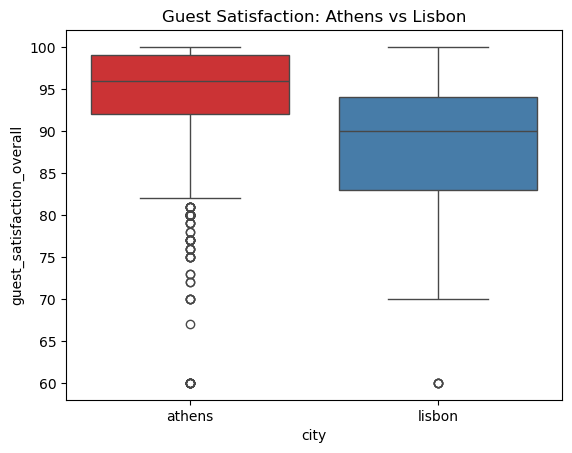

In [ ]:
# Guest satisfaction

cities = ['athens', 'lisbon']
df_sel = df_airbnb[df_airbnb['city'].isin(cities)]

# Keep data between 1st and 99th percentile
lower = df_sel['guest_satisfaction_overall'].quantile(0.01)
upper = df_sel['guest_satisfaction_overall'].quantile(0.99)
df_guest_filtered = df_sel[(df_sel['guest_satisfaction_overall'] >= lower) & (df_sel['price'] <= upper)]

sns.boxplot(x='city', y='guest_satisfaction_overall', data=df_guest_filtered, palette="Set1")
plt.title("Guest Satisfaction: Athens vs Lisbon")
plt.show()

/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_22963/3385565001.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='price', data=df_filtered, palette="Set1")


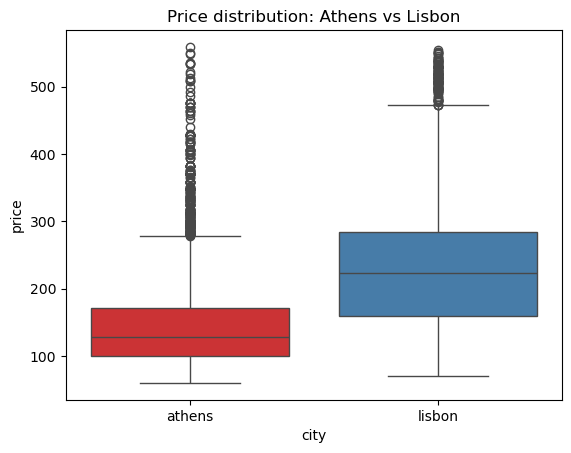

In [148]:
# Boxplot for price

# Keep data between 1st and 99th percentile
lower = df_sel['price'].quantile(0.01)
upper = df_sel['price'].quantile(0.99)
df_filtered = df_sel[(df_sel['price'] >= lower) & (df_sel['price'] <= upper)]

sns.boxplot(x='city', y='price', data=df_filtered, palette="Set1")
plt.title("Price distribution: Athens vs Lisbon")
plt.show()

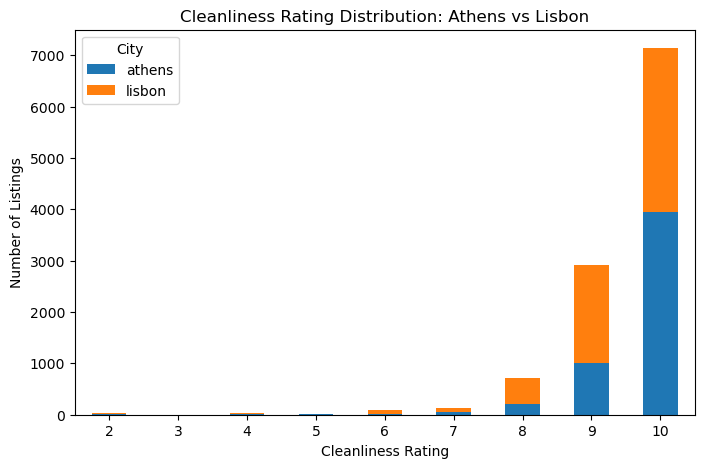

In [149]:
# Barplot for cleanliness ratings

counts = df_sel.groupby(['cleanliness_rating', 'city']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.xlabel("Cleanliness Rating")
plt.ylabel("Number of Listings")
plt.title("Cleanliness Rating Distribution: Athens vs Lisbon")
plt.xticks(rotation=0)
plt.legend(title="City")
plt.show()

In [150]:
# # Distance to city center
# plt.figure(figsize=(8,5))
# sns.boxplot(x='city', y='dist', data=df_sel, palette="Set1")
# plt.title("Distance to City Center: Athens vs Lisbon")
# plt.show()

# t_stat, p_value = stats.ttest_ind(
#     df_sel[df_sel.city=='athens']['dist'],
#     df_sel[df_sel.city=='lisbon']['dist']
# )
# print(f"dist t-test: t = {t_stat:.2f}, p = {p_value:.5f}\n")

/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_22963/4216756835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='metro_dist', data=df_filtered, palette='Set1')


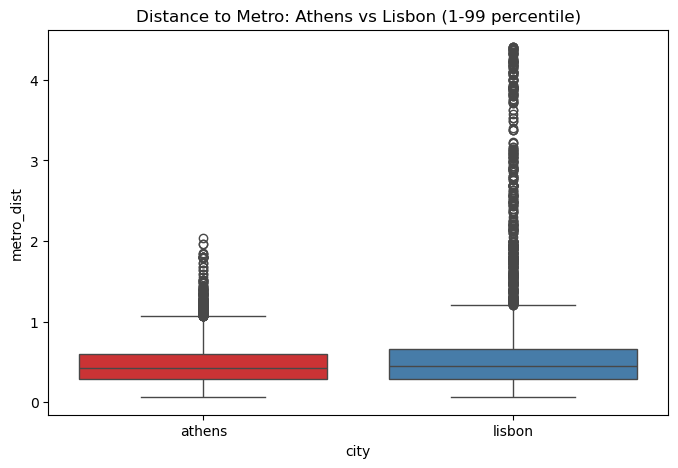

metro_dist t-test: t = -14.66, p = 0.00000



In [151]:
# Distance to metro

lower = df_sel['metro_dist'].quantile(0.01)
upper = df_sel['metro_dist'].quantile(0.99)
df_filtered = df_sel[(df_sel['metro_dist'] >= lower) & (df_sel['metro_dist'] <= upper)]

plt.figure(figsize=(8,5))
sns.boxplot(x='city', y='metro_dist', data=df_filtered, palette='Set1')
plt.title("Distance to Metro: Athens vs Lisbon (1-99 percentile)")
plt.show()

t_stat, p_value = stats.ttest_ind(
    df_filtered[df_filtered.city=='athens']['metro_dist'],
    df_filtered[df_filtered.city=='lisbon']['metro_dist']
)
print(f"metro_dist t-test: t = {t_stat:.2f}, p = {p_value:.5f}\n")

/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_22963/3127584451.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='attr_index', data=df_filtered, palette='Set1')


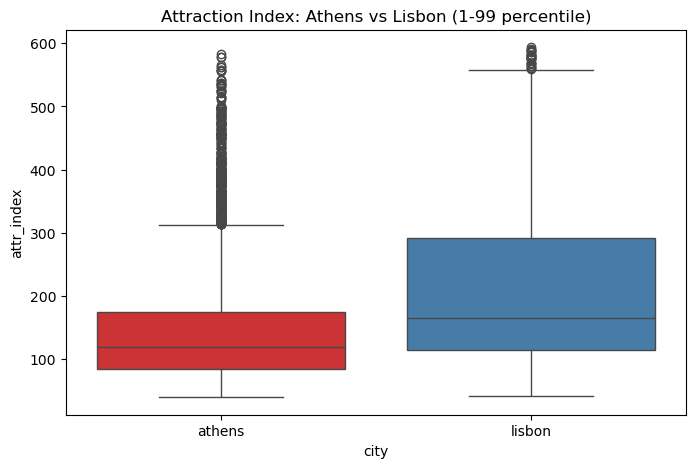

attr_index t-test: t = -28.68, p = 0.00000



In [152]:
# Attraction index (filtered in 1-99 percentile due to extreme outliers)
lower = df_sel['attr_index'].quantile(0.01)
upper = df_sel['attr_index'].quantile(0.99)
df_filtered = df_sel[(df_sel['attr_index'] >= lower) & (df_sel['attr_index'] <= upper)]

plt.figure(figsize=(8,5))
sns.boxplot(x='city', y='attr_index', data=df_filtered, palette='Set1')
plt.title("Attraction Index: Athens vs Lisbon (1-99 percentile)")
plt.show()

t_stat, p_value = stats.ttest_ind(
    df_filtered[df_filtered.city=='athens']['attr_index'],
    df_filtered[df_filtered.city=='lisbon']['attr_index']
)
print(f"attr_index t-test: t = {t_stat:.2f}, p = {p_value:.5f}\n")

/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_22963/979850087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='rest_index', data=df_filtered, palette='Set1')


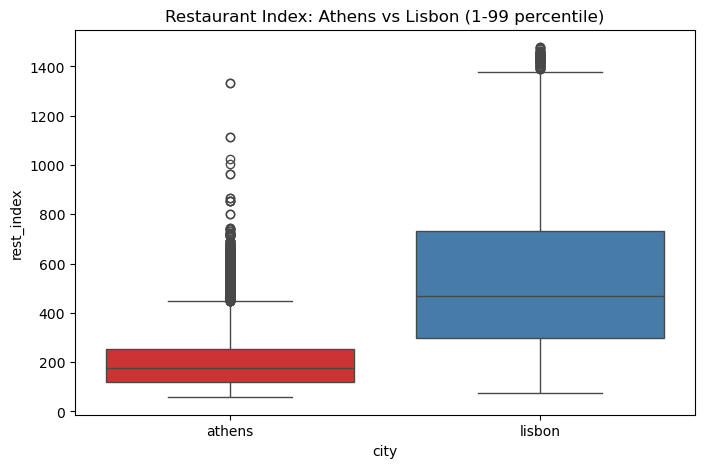

rest_index t-test: t = -65.36, p = 0.00000



In [153]:
# Restaurant index (filtered in 1-99 percentile due to extreme outliers)
lower = df_sel['rest_index'].quantile(0.01)
upper = df_sel['rest_index'].quantile(0.99)
df_filtered = df_sel[(df_sel['rest_index'] >= lower) & (df_sel['rest_index'] <= upper)]

plt.figure(figsize=(8,5))
sns.boxplot(x='city', y='rest_index', data=df_filtered, palette='Set1')
plt.title("Restaurant Index: Athens vs Lisbon (1-99 percentile)")
plt.show()

t_stat, p_value = stats.ttest_ind(
    df_filtered[df_filtered.city=='athens']['rest_index'],
    df_filtered[df_filtered.city=='lisbon']['rest_index']
)
print(f"rest_index t-test: t = {t_stat:.2f}, p = {p_value:.5f}\n")

Room type — Chi2 = 1046.01, p = 0.00000
----------------------------------------------------------------------


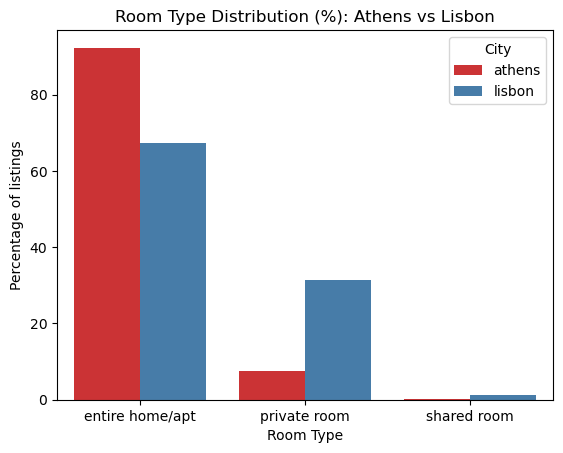

In [161]:
# Type of accomodation
room_counts = (
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]
    .groupby(['city', 'room_type_clean'])
    .size()
    .reset_index(name='count')
)

room_counts['percent'] = room_counts.groupby('city')['count'].transform(lambda x: 100 * x / x.sum())

# Chi-square test
ct_room = pd.crosstab(
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]['city'], 
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]['room_type_clean']
)
chi2, p, dof, expected = stats.chi2_contingency(ct_room)
print(f"Room type — Chi2 = {chi2:.2f}, p = {p:.5f}")
print("-" * 70)

# Barplot
sns.barplot(
    x='room_type_clean',
    y='percent',
    hue='city',
    data=room_counts,
    palette='Set1'
)
plt.title('Room Type Distribution (%): Athens vs Lisbon')
plt.ylabel('Percentage of listings')
plt.xlabel('Room Type')
plt.legend(title='City')
plt.show()

Superhost Status — Chi2 = 585.79, p = 0.00000
----------------------------------------------------------------------


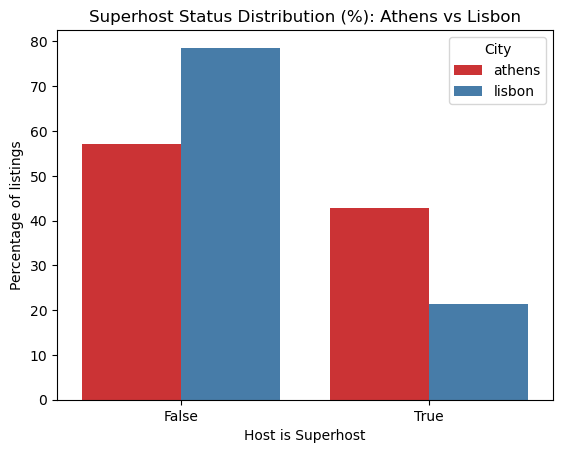

In [160]:
# Host is superhost?
superhost_counts = (
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]
    .groupby(['city', 'host_is_superhost'])
    .size()
    .reset_index(name='count')
)

superhost_counts['percent'] = superhost_counts.groupby('city')['count'].transform(lambda x: 100 * x / x.sum())

# Chi-square test
ct_superhost = pd.crosstab(
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]['city'], 
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]['host_is_superhost']
)
chi2, p, dof, expected = stats.chi2_contingency(ct_superhost)
print(f"Superhost Status — Chi2 = {chi2:.2f}, p = {p:.5f}")
print("-" * 70)

# Barplot
sns.barplot(
    x='host_is_superhost',
    y='percent',
    hue='city',
    data=superhost_counts,
    palette='Set1'
)
plt.title('Superhost Status Distribution (%): Athens vs Lisbon')
plt.ylabel('Percentage of listings')
plt.xlabel('Host is Superhost')
plt.legend(title='City')
plt.show()

Host Listing Category — Chi2 = 595.28, p = 0.00000
----------------------------------------------------------------------


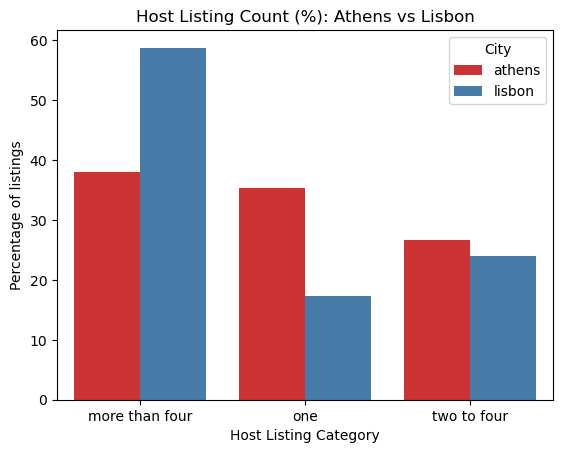

In [162]:
# Host Listing Count
host_counts = (
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]
    .groupby(['city', 'host_listing_count']) 
    .size()
    .reset_index(name='count')
)

host_counts['percent'] = host_counts.groupby('city')['count'].transform(lambda x: 100 * x / x.sum())

# Chi-square test
ct_host = pd.crosstab(
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]['city'], 
    df_sel[df_sel['city'].isin(['athens', 'lisbon'])]['host_listing_count']
)
chi2, p, dof, expected = stats.chi2_contingency(ct_host)
print(f"Host Listing Category — Chi2 = {chi2:.2f}, p = {p:.5f}")
print("-" * 70)

# Barplot
sns.barplot(
    x='host_listing_count',
    y='percent',
    hue='city',
    data=host_counts,
    palette='Set1'
)
plt.title('Host Listing Count (%): Athens vs Lisbon')
plt.ylabel('Percentage of listings')
plt.xlabel('Host Listing Category')
plt.legend(title='City')
plt.show()